### ARMA, lag=2, ma=0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from tqdm import tqdm
from FactorAnalysis import FactorAnalysis
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")


In [ ]:
pct_close = pd.read_parquet("../db/tw/pdata/close_pct.parquet")
pct_close_w = pct_close.resample("W-FRI").sum()
# random sampling
rand = 100
list_sample = np.random.randint(0, len(pct_close_w.columns), rand)
# random sampling
indexes = pct_close_w.index
tickers = pct_close_w.iloc[:, :].columns
indices = indexes[52:]
forecast = np.zeros((len(indices), len(tickers)))
print(indices[0])
for index, date in enumerate(tqdm(indices, desc=f"arma model for top {len(tickers)}, enumerate by da")):
    pct_train = pct_close_w.loc[indexes[index]:date]
    for i in range(len(tickers)):
        series = pct_train[tickers[i]]
        if series.isna().any():
            prediction = 0
            print(tickers[i], "failed at", date)
            continue
            ###### ARIMA ma
        else:
            model = sm.tsa.arima.ARIMA(series, order=(2, 0, 0))
            model_fit = model.fit()
            prediction = model_fit.forecast().values[0]
        forecast[index, i] = prediction
factor = pd.DataFrame(forecast, columns=tickers, index=indices)


In [16]:
factor = pd.DataFrame(forecast, columns=tickers, index=indices)
new = factor.replace(0.0, None).dropna(how='all').ffill()
new.to_parquet("ARMA_2021to20221118_all_factor.parquet")
factor = new

In [19]:
factor = pd.read_parquet("ARMA_2021to20221118_all_factor.parquet")
factor

ticker,0050,0051,0052,0053,0055,0056,0057,0061,1101,1102,...,6863,6869,6873,6901,6902,6906,6916,6933,6937,8476
da,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0.004868,0.005398,0.009215,0.006675,-0.001674,0.001444,0.005637,0.001658,-0.004021,0.002242,...,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005
2021-01-08,0.008443,0.005290,0.014322,0.009680,-0.000043,0.001863,0.008994,0.000457,0.002324,-0.005990,...,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005
2021-01-15,0.013684,0.006236,0.021825,0.011122,-0.000202,0.003361,0.011017,0.004952,0.004899,-0.005310,...,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005
2021-01-22,0.009114,0.004578,0.023404,0.011647,-0.000223,0.000209,0.010980,0.006141,0.008215,-0.004523,...,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005
2021-01-29,0.001554,0.003730,0.006167,0.003783,-0.002046,0.001099,0.005445,0.009569,0.002504,-0.000942,...,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-21,-0.007862,-0.005920,-0.012508,-0.007031,-0.004363,-0.021838,-0.008613,-0.004784,-0.011097,-0.002510,...,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005
2022-10-28,-0.006744,-0.003629,-0.011312,-0.006431,0.001323,0.001688,-0.006413,-0.010089,-0.003946,0.005775,...,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005
2022-11-04,-0.004792,-0.003736,-0.005979,-0.004074,-0.002428,-0.002807,-0.004454,-0.001211,-0.009944,-0.002974,...,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005


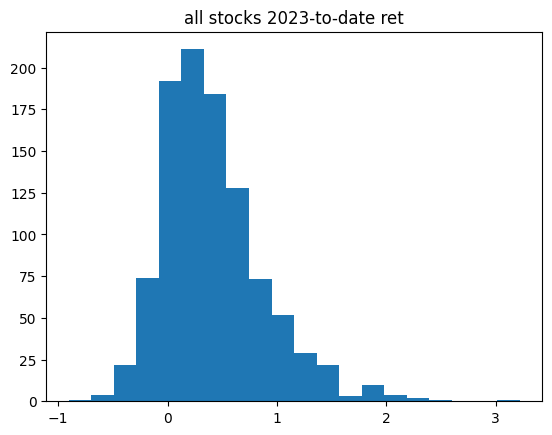

In [20]:
# fa = FactorAnalysis()
# _ = fa.plot_basic(factor, top=5)

all = pct_close_w[pct_close_w.columns.intersection(factor.columns)].loc['2023-01-01':]
all_cumsum = all.cumsum()
all_ret = all_cumsum.iloc[-1, :]
plt.hist(all_ret, bins=20)
plt.title("all stocks 2023-to-date ret")
plt.show()

<Axes: title={'center': '10 quantile cumsum distribution'}, xlabel='da'>

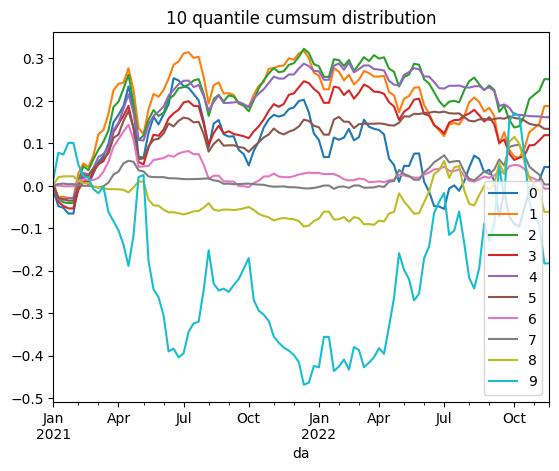

In [24]:
def get_demean_weighting(factor):
    df1 = factor.dropna(axis='columns', how='all').copy()
    demean = df1.sub(df1.mean(axis=1), axis=0)
    weighting = demean.div(demean.abs().sum(axis=1), axis=0)
    return weighting
def _reweighting_equal(weighting:pd.DataFrame):
    def equal_weight(row: pd.Series):
        count_larger_than_zero = (row != 0).sum()
        if count_larger_than_zero > 0:
            row = row.apply(lambda x: 1 / count_larger_than_zero if x > 0 else x)
        return row
    return weighting.apply(equal_weight, axis=1)
quantile = 10
time_length = len(factor)
quantile_column = [[None]*quantile]*time_length
quantile_df = pd.DataFrame(quantile_column)
for da in range(time_length):
    row = factor.iloc[da, :]
    col = row.sort_values(ascending=False).index
    for i in range(0, quantile):
        quantile_df.iloc[da, i] = list(col[i*int(len(row)/quantile):(i+1)*int(len(row)/quantile)])

pct_close_w_corres = pct_close_w[pct_close_w.columns.intersection(factor.columns)].shift(-2)

index = factor.index
quantiles = [None] * quantile
for qt_iter in range(quantile):
    quantile_1 = quantile_df.iloc[:, qt_iter]
    df_1 = factor.copy()
    for i in range(len(quantile_1)):
        df_1.loc[index[i], ~df_1.columns.isin(quantile_1[i])] = 0
    weighting_1 = _reweighting_equal(df_1)
    ret = pct_close_w_corres.loc[weighting_1.index[0]:] * weighting_1
    quantiles[qt_iter] = ret.sum(axis=1).cumsum()

quantilized_cumsum = pd.DataFrame(quantiles).T
quantilized_cumsum.loc['2021-01-01':'2022-12-01'].plot(title="10 quantile cumsum distribution")

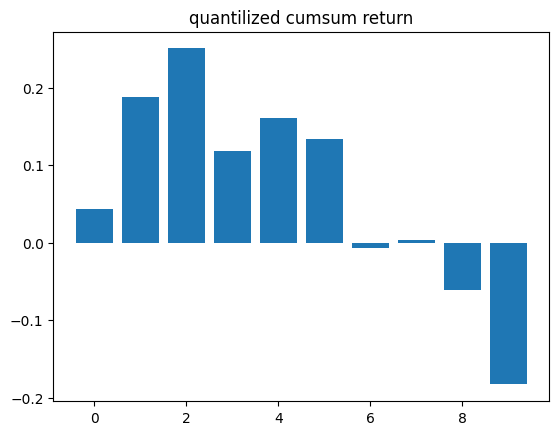

In [25]:
"""
0: AR預測值最高; 9: 最低 (number of stocks in thje stock pool: 1013; stocks per quantile: 100, 等權做多報酬)
"""
plt.bar(quantilized_cumsum.columns, quantilized_cumsum.iloc[-1, :])
plt.title("quantilized cumsum return")
plt.show()
